Saving a notebook for eventual credit card clustering models

Imports

In [2]:
# data structures
import pandas as pd
#vis
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
#clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [3]:
%matplotlib inline

In [8]:
tccp = pd.read_csv("../data/TCCP_Surveys_Cleaned.csv", index_col=0)

In [9]:
tccp.shape

(9275, 12)

In [12]:
tccp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9275 entries, 0 to 9274
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Agreement_Date                    9275 non-null   datetime64[ns]
 1   Institution_Name                  9275 non-null   object        
 2   Plan_Name                         9275 non-null   object        
 3   Availability_of_Credit_Card_Plan  9275 non-null   object        
 4   Location                          9275 non-null   object        
 5   APR                               9275 non-null   float64       
 6   Index                             9275 non-null   object        
 7   Variable_Rate_Index               9275 non-null   object        
 8   Grace_Period                      9275 non-null   float64       
 9   Annual_Fee                        9275 non-null   float64       
 10  Late_Fee                          9275 non-null 

Turn Agreement_Date back into datetime

In [11]:
tccp["Agreement_Date"] = pd.to_datetime(tccp["Agreement_Date"])

In [13]:
tccp.isnull().sum()

Agreement_Date                      0
Institution_Name                    0
Plan_Name                           0
Availability_of_Credit_Card_Plan    0
Location                            0
APR                                 0
Index                               0
Variable_Rate_Index                 0
Grace_Period                        0
Annual_Fee                          0
Late_Fee                            0
Telephone_Number_for_Consumers      0
dtype: int64

In [14]:
tccp.head()

,Agreement_Date,Institution_Name,Plan_Name,Availability_of_Credit_Card_Plan,Location,APR,Index,Variable_Rate_Index,Grace_Period,Annual_Fee,Late_Fee,Telephone_Number_for_Consumers
0,2022-07-31,CENTRAL BANK & TRUST COMPANY,Visa,Regional,IN; KY; OH;,16.50,F,--,25.0,20.0,5.000000,(800) 637-6884
1,2022-07-31,SOLVAY BANK,Visa Platinum Standard,One State,NY,14.88,F,--,25.0,0.0,0.000000,(315) 484-2201
2,2022-07-31,"VSECU, a division of New England Federal Credi...",Vermont Platinum Credit Card,National,National,10.00,F,--,25.0,0.0,20.000000,(800) 371-5162
3,2022-07-31,BMO HARRIS BANK NATIONAL ASSOCIATION,Mastercard Cardholder Agreement (4.1.2021).pdf,National,National,19.74,V,Prime,25.0,0.0,29.000000,(888) 340-2265
4,2022-07-31,PENTAGON FEDERAL CREDIT UNION,Pricing List and Cardholder Agreement for Visa...,National,National,16.99,V,Prime,25.0,0.0,23.211017,(800) 247-5626


In [ ]:
data_categorical = tccp[['Availability_of_Credit_Card_Plan', 'Index']]

In [102]:
# Step 3: Preprocess the data
# Drop non-numeric columns that are not suitable for clustering
data_numeric = tccp[['APR','Grace_Period', 'Annual_Fee', 'Late_Fee']]

In [103]:
sc = StandardScaler()

In [104]:
data_scaled = sc.fit_transform(data_numeric)

In [113]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)

In [114]:
tccp["cluster"] = kmeans.fit_predict(data_scaled)

/Users/christopherjoyce/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=2)

In [116]:
data_2d = pca.fit_transform(data_scaled)

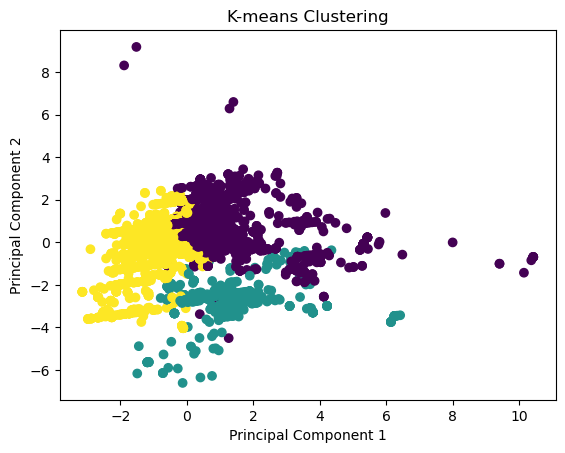

In [110]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=tccp['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [111]:
sil = silhouette_score(data_scaled, tccp["cluster"])

In [112]:
sil

0.29111533309905363

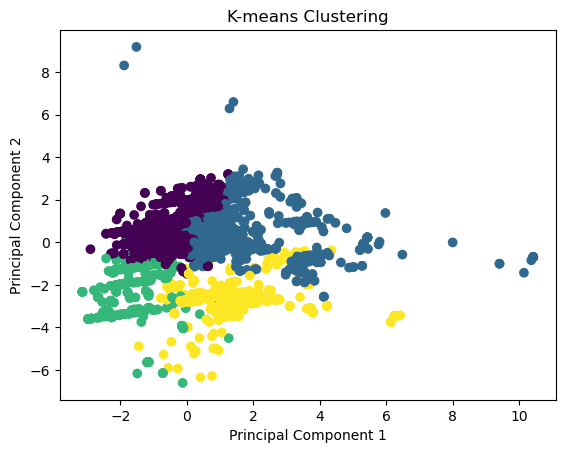

In [117]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=tccp['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [118]:
sil = silhouette_score(data_scaled, tccp["cluster"])

In [119]:
sil

0.35780579234224713